<a href="https://colab.research.google.com/github/sanhiitaa/generative-ai/blob/main/intro_to_generative_ai_with_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python SDK

A Python SDK (Software Development Kit) is a collection of tools, libraries, and documentation that allows developers to interact with a specific platform, service, or application using the Python programming language.

Here's what a Python SDK typically provides:

**Libraries and Modules**: Pre-built functions and classes that handle common tasks like authentication, making API requests, data parsing, and error handling.

**API Wrappers**: Simplifies interaction with complex APIs by providing easy-to-use functions that abstract away the underlying details.

**Documentation and Examples**: Guides on how to use the SDK, including code examples and tutorials.
Popular examples of Python SDKs:
Boto3: For interacting with Amazon Web Services (AWS) like S3, EC2, and DynamoDB.

**Google Cloud Client Library**: For interacting with Google Cloud Platform (GCP) services like Google Cloud Storage and Google BigQuery.

**Twilio Python SDK**: For integrating with the Twilio platform to send SMS, make phone calls, and more.
Benefits of using a Python SDK:
Faster Development: Saves time and effort by providing ready-to-use components.

**Improved Productivity**: Simplifies complex tasks, allowing developers to focus on application logic.

**Easier Maintenance**: SDKs are typically maintained by the service provider, ensuring compatibility and updates.

`(answer generated by gemini)`

## Installing Python SDK for Gemini API

In [1]:
!pip install -q -U google-generativeai==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.3/717.3 kB 46.4 MB/s eta 0:00:00


## Importing necessary packages

Libraries to manipulate and display input text in a formatted way.

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import Markdown, display

def markdown(text):
  text= text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# used to securely store our API key
from google.colab import userdata

In [4]:
# passing the API key to genai to fetch an environment variable
gemini_api_key = userdata.get('gemini-api-key')

genai.configure(api_key=gemini_api_key)

In [5]:
# listing out all the available gemini models():
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Instantiating a model

### Prompt type: text

In [6]:
model = genai.GenerativeModel('gemini-pro')
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

will use `generate_content` method to generate responses, it takes:
* as `input` : text, image
* as `output` : text

In [7]:
%%time
response = model.generate_content('what is the meaning of life?')

CPU times: user 60.2 ms, sys: 11.3 ms, total: 71.6 ms
Wall time: 9.26 s


In [9]:
 response.text

'There is no one definitive answer to the question of the meaning of life, as it is a subjective experience that varies from person to person. However, some common themes that emerge when people explore this question include:\n\n* **Finding purpose and fulfillment:** Many people find meaning in life by pursuing activities and goals that give them a sense of purpose and fulfillment. This could involve work, hobbies, relationships, or volunteering.\n* **Making a difference in the world:** Some people find meaning in life by making a positive contribution to society or the world around them. This could involve anything from volunteering to working for a cause that you are passionate about.\n* **Cultivating personal growth and development:** Others find meaning in life by focusing on their own personal growth and development. This could involve learning new skills, developing new interests, or exploring new perspectives.\n* **Experiencing love and connection:** Many people find meaning in 

In [10]:
markdown(response.text)

> There is no one definitive answer to the question of the meaning of life, as it is a subjective experience that varies from person to person. However, some common themes that emerge when people explore this question include:
> 
> * **Finding purpose and fulfillment:** Many people find meaning in life by pursuing activities and goals that give them a sense of purpose and fulfillment. This could involve work, hobbies, relationships, or volunteering.
> * **Making a difference in the world:** Some people find meaning in life by making a positive contribution to society or the world around them. This could involve anything from volunteering to working for a cause that you are passionate about.
> * **Cultivating personal growth and development:** Others find meaning in life by focusing on their own personal growth and development. This could involve learning new skills, developing new interests, or exploring new perspectives.
> * **Experiencing love and connection:** Many people find meaning in life through their relationships with others. This could involve spending time with loved ones, forming new connections, or simply being present for those who matter most to you.
> * **Living in the present moment:** Some people find meaning in life by focusing on the present moment and appreciating the simple things in life. This could involve practicing mindfulness, meditation, or simply taking time to enjoy the beauty around you.
> 
> Ultimately, the meaning of life is something that each person must discover for themselves. There is no right or wrong answer, and what gives one person meaning may not give another person meaning. The important thing is to explore different possibilities and find what resonates with you.

with `stream = True`

In [11]:
%%time
response = model.generate_content('what is the meaning of life?', stream=True)

CPU times: user 58.2 ms, sys: 5.63 ms, total: 63.8 ms
Wall time: 7.74 s


In [17]:
for chunk in response:
  print(chunk.text)
  print('****'*15)


The meaning of life is a deep philosophical question that has been pondered by humans for
************************************************************
 centuries. There is no one definitive answer, as the meaning of life can be different for each person. However, some common ideas about the meaning of life include
************************************************************
:

* **To find happiness and fulfillment.** Many people believe that the meaning of life is to find happiness and fulfillment in all aspects of our lives. This can include finding joy in our relationships, our work, and our hobbies. It can also mean living a life that is in alignment with our values and goals.
************************************************************

* **To make a difference in the world.** Some people believe that the meaning of life is to make a difference in the world. This can involve helping others, making a positive impact on the environment, or creating something that will last beyond our

### Prompt type: image

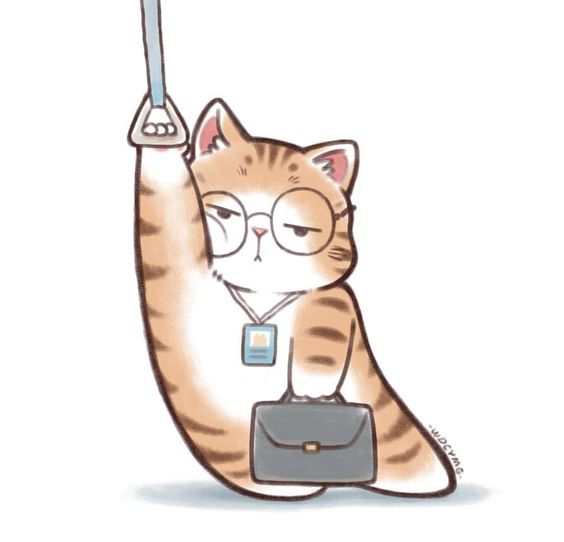

In [6]:
import PIL.Image

img= PIL.Image.open('/content/worky-cat.jpg')
img

In [19]:
model = genai.GenerativeModel('gemini-pro-vision')

In [20]:
response = model.generate_content(img)

markdown(response.text)

>  上班喵

the response `上班喵` is in chinese and translates to `meow at work` which i think is pretty amusing!

trying a different image and model

In [24]:
img2= PIL.Image.open('/content/rabbi-carrot.jpg')

# model
model = genai.GenerativeModel('gemini-1.5-flash-latest')

# response generation
response = model.generate_content(img2)
markdown(response.text)


> This is a cute cartoon image of a rabbit holding a carrot. The rabbit is pink and white with big ears. The carrot is orange with a green stem and leaves. There are three small red hearts floating around. The background is white. The overall tone of the image is happy and playful.

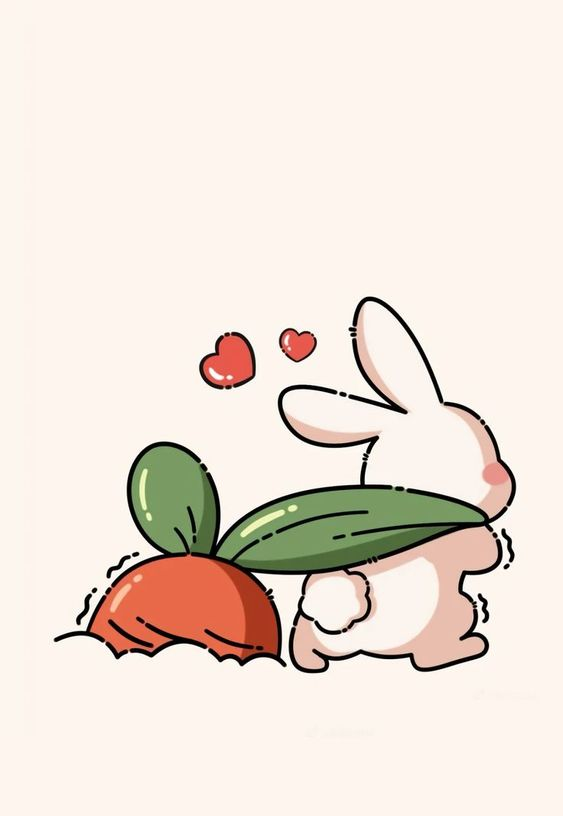

In [26]:
img2

### Prompt type: text + image

In [7]:
# instantiating model
model = genai.GenerativeModel('gemini-1.5-flash-latest')

# generating response
response = model.generate_content(['write a short story with around the image provided and give it an appropriate title', img])
response.resolve()

In [8]:
markdown(response.text)

> ##  The Commute
> 
> The train was packed, every inch crammed with bodies jostling for space.  But for Mittens, it was just another Tuesday. He hung on tight to the strap, his tail swishing back and forth as he navigated the sea of legs and backpacks. A briefcase, slightly too large for his small frame, dangled from his paw. 
> 
> Mittens had a reputation to uphold. He was a cat of routine, and his daily commute was no exception. The office was expecting him, and he wasn’t one to be late. He’d mastered the art of navigating the crowded platform, the rush hour madness, and the occasional clumsy human step. It was all in a day's work for a cat like Mittens. 
> 
> He squeezed his way through a group of teenagers, their loud laughter momentarily drowning out the train's screeching brakes.  The doors opened, and Mittens, with a practiced agility, leaped onto the train. His eyes narrowed as he scanned the faces of the passengers, searching for an empty seat. He wasn’t too picky –  a space on the floor would do just fine. 
> 
> The journey was long, but Mittens was used to it. He settled down,  tail curled neatly around his body, and his eyes closed, dreaming of the delicious tuna treat waiting for him at his desk. 
> 
> The cat was determined to get to the office on time. He was a dedicated employee, after all. And besides, everyone knew that a cat’s work is never done. 


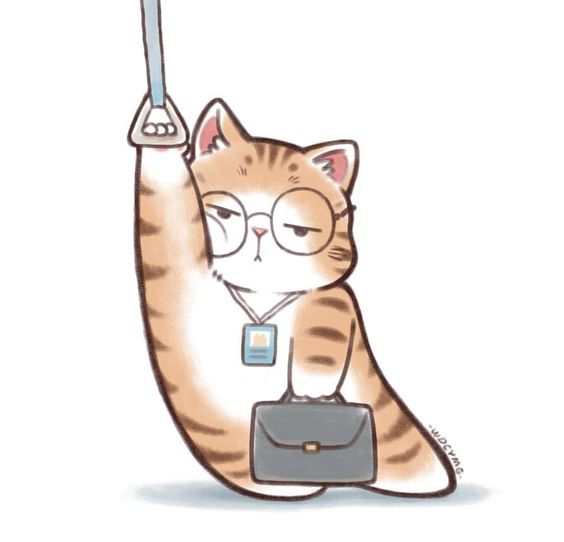

In [9]:
img